In [3]:
#imports
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import numpy as np

# Problem 1b

In [4]:
def comoving_dist(z,Omega_m):
    def f(z):
        return (70*(Omega_m*(1+z)**3 + (1-Omega_m)))**-1
    
    return integrate.quad(f, 0, z)[0]

def luminosity_dist(z,Omega_m):
    return (1+z)*comoving_dist(z,Omega_m)

def angular_dist(z,Omega_m):
    return comoving_dist(z,Omega_m)/(1+z)

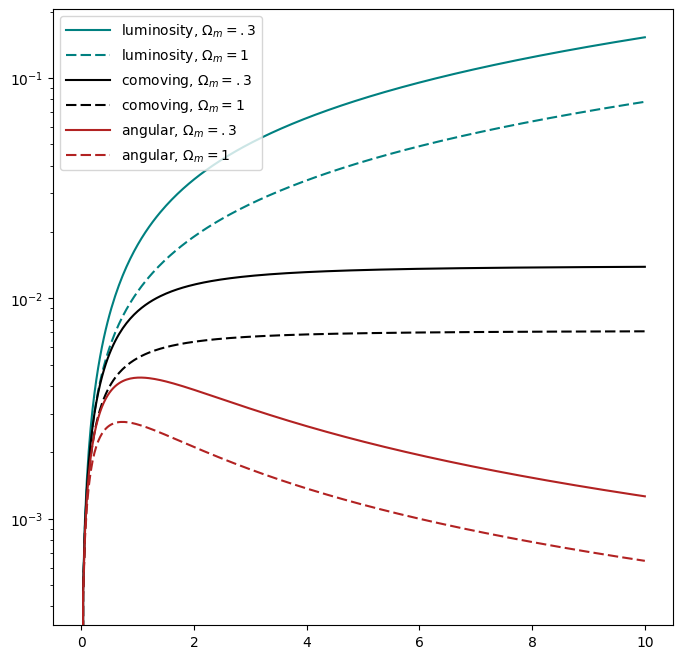

In [5]:
plt.figure(figsize = (8,8))
zs = np.linspace(0,10,300)

plt.yscale('log')

plt.plot(zs,[luminosity_dist(z,.3) for z in zs], color = 'teal', label = "luminosity, $\Omega_m = .3$")
plt.plot(zs,[luminosity_dist(z,1) for z in zs],linestyle=(0,(5,2)), color='teal', label = "luminosity, $\Omega_m = 1$")

plt.plot(zs,[comoving_dist(z,.3) for z in zs], color = 'black', label = "comoving, $\Omega_m = .3$")
plt.plot(zs,[comoving_dist(z,1) for z in zs],linestyle=(0,(5,2)), color='black', label = "comoving, $\Omega_m = 1$")

plt.plot(zs,[angular_dist(z,.3) for z in zs], color = 'firebrick', label = "angular, $\Omega_m = .3$")
plt.plot(zs,[angular_dist(z,1) for z in zs],linestyle=(0,(5,2)), color = 'firebrick', label = "angular, $\Omega_m = 1$")

plt.legend(handlelength=3.2,title_fontsize=11.5)

# Problem 3 

In [41]:
cH0 = 1/70 # c/H0
Omega_m = .3
Omega_lambda = .7

def chi_analytic_expansion(z):
    first = 1
    second = -1*((3*Omega_m/4) + (1-Omega_m-Omega_lambda)/2)
    third = ((3*Omega_m + 2*(1-Omega_m-Omega_lambda))**2)/8 - (3*Omega_m + 1 - Omega_m - Omega_lambda)/6
    return cH0*(first*z + second*(z**2) + third*(z**3))

def chi_analytic_expansion_new(z):
    first = 1
    second = -1/4 * (Omega_m-2*Omega_lambda+2)
    third = 1/6 * (3*Omega_lambda**2 - Omega_lambda*(3*Omega_m + 5) + 3/4*Omega_m**2 + Omega_m + 2)
    return cH0*(first*z + second*(z**2) + third*(z**3))

def chi_numerical(z):
    def f(x):
        return cH0 * (Omega_m*(1+z)**3 + Omega_lambda + (1-Omega_m-Omega_lambda)*(1+z)**2)**-.5
    
    return integrate.quad(f, 0, z)[0]

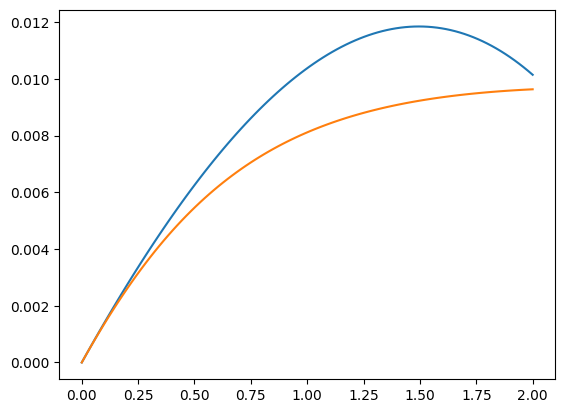

In [48]:
zs = np.linspace(0,2,100)
plt.plot(zs,chi_analytic_expansion_new(zs))
plt.plot(zs,[chi_numerical(z) for z in zs])
plt.show()

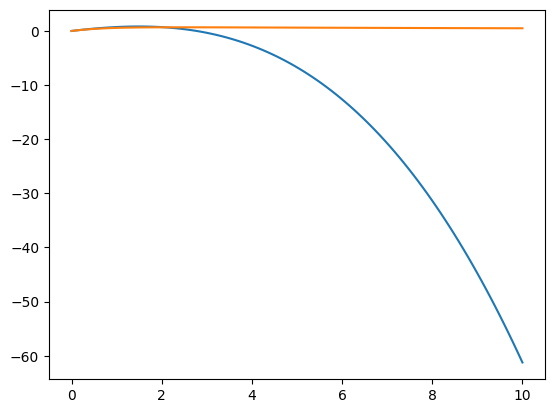

In [39]:
zs = np.linspace(0,10,100)
plt.plot(zs,chi_analytic_expansion(zs))
plt.plot(zs,[chi_numerical(z) for z in zs])
plt.show()

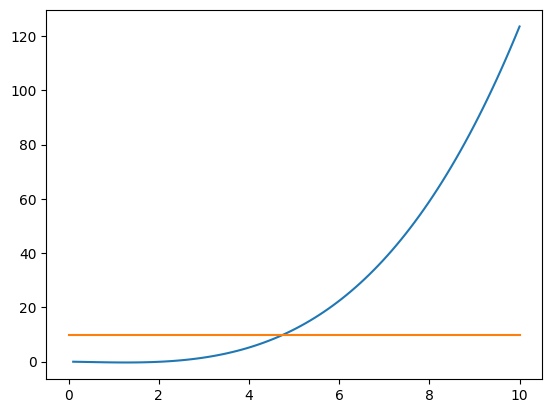

In [24]:
#plot accuracy vs redshift, and accuracy = 10 line
plt.plot(zs[1:],np.divide(([chi_numerical(z) for z in zs][1:]-chi_analytic_expansion(zs)[1:]),[chi_numerical(z) for z in zs][1:]))
plt.plot([0,10],[10,10])

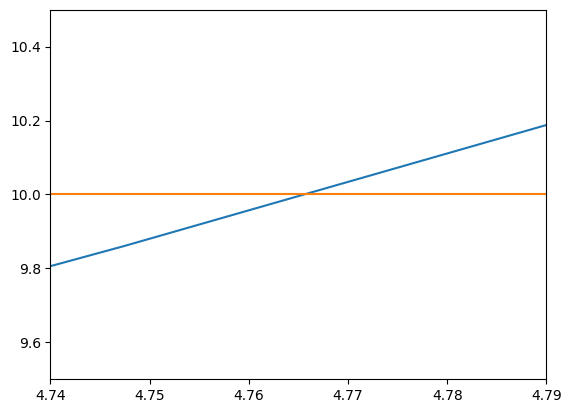

In [25]:
#zoom to find intersection
plt.xlim([4.74,4.79])
plt.ylim([9.5,10.5])
plt.plot(zs[1:],np.divide(([chi_numerical(z) for z in zs][1:]-chi_analytic_expansion(zs)[1:]),[chi_numerical(z) for z in zs][1:]))
plt.plot([0,10],[10,10])